#**Classification TASK**


##Puprose of the program:
The purpose of this task is to analyse the dataset containing the data on the satisfaction of airplane passengers. 
<br><b>The total number of columns in the dataset=24<br>The total number of rows in the dataset=103904</b>

##Libraries and functions for the analysis

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import io
from sklearn.linear_model import LogisticRegression
from google.colab import files
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

Above are all the libraries that are necessary for the analysis and data representations of the dataset

##Uploading the datase

In [2]:
uploaded = files.upload()

Saving planesatisfaction.csv to planesatisfaction.csv


In [3]:

data = pd.read_csv(io.BytesIO(uploaded['planesatisfaction.csv']))
data.head()

,Unnamed: 0,id,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Inflightwifiservice,Departure/Arrivaltimeconvenient,EaseofOnlinebooking,Gatelocation,Foodanddrink,Onlineboarding,Seatcomfort,Inflightentertainment,On-boardservice,Legroomservice,Baggagehandling,Checkinservice,Inflightservice,Cleanliness,DepartureDelayinMinutes,ArrivalDelayinMinutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
data.shape

(103904, 25)

We can find out that there are 23 attributes and 103904

In [5]:
df = data
df.drop(['Unnamed: 0','id'], axis=1, inplace=True)

Data is copied into another variable. And, unnamed column is removed because it only provides the rows in the dataset

In [6]:
df.head()

,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Inflightwifiservice,Departure/Arrivaltimeconvenient,EaseofOnlinebooking,Gatelocation,Foodanddrink,Onlineboarding,Seatcomfort,Inflightentertainment,On-boardservice,Legroomservice,Baggagehandling,Checkinservice,Inflightservice,Cleanliness,DepartureDelayinMinutes,ArrivalDelayinMinutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


##Brief summary of raw data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Gender                           103904 non-null  object 
 1   CustomerType                     103904 non-null  object 
 2   Age                              103904 non-null  int64  
 3   TypeofTravel                     103904 non-null  object 
 4   Class                            103904 non-null  object 
 5   FlightDistance                   103904 non-null  int64  
 6   Inflightwifiservice              103904 non-null  int64  
 7   Departure/Arrivaltimeconvenient  103904 non-null  int64  
 8   EaseofOnlinebooking              103904 non-null  int64  
 9   Gatelocation                     103904 non-null  int64  
 10  Foodanddrink                     103904 non-null  int64  
 11  Onlineboarding                   103904 non-null  int64  
 12  Se

From this, we can learn that all of the columns don't contain any null values. And that, gender, customerType, TypeofTravel, Class and satisfaction are of object datatypy, arrivaldelayinminutes are of float data type and the rest are of int data types

In [8]:
df.duplicated().sum()

0

From this, we can learn that there is no duplicated rows in df dataset

##Analyzing dataset and Visualizing them

###Visualizing Categorical Data

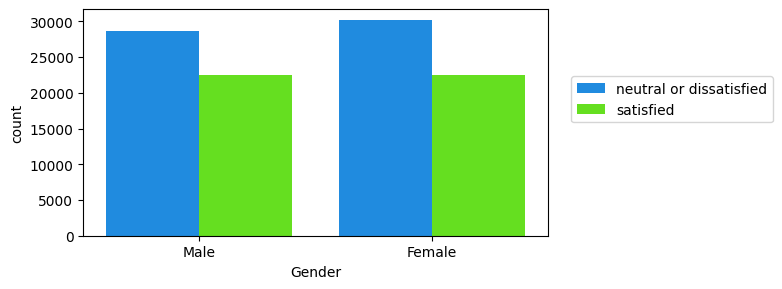

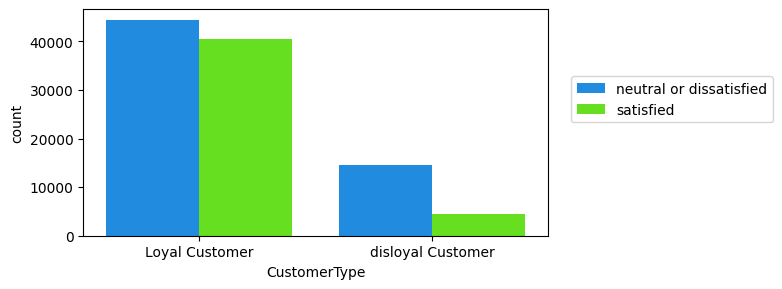

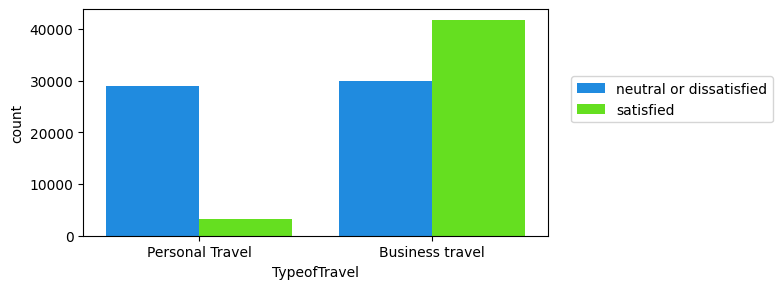

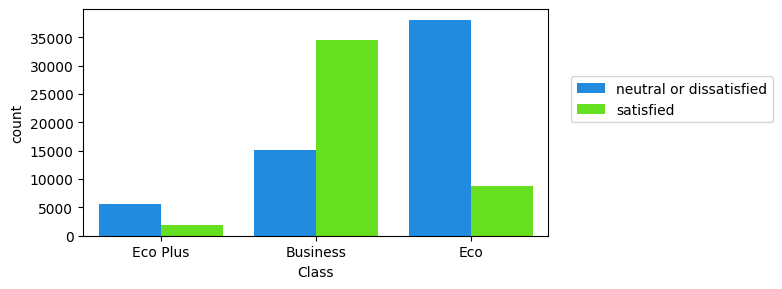

In [9]:
categorical=['Gender', 'CustomerType', 'TypeofTravel', 'Class']
for col in categorical:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=df,x=col,hue ='satisfaction',palette='gist_rainbow_r')
    plt.legend(loc=(1.05,0.5))

<b>Gender</b>: We can observe that the difference between neutral or dissatified and satisfied ratio is same i.e. the satisfied reviews are lesser than neutral or dissatisfied reviews.
<br><b>Customer Type</b>: Loyal passengers are very high in number. Even among loyal passengers, the ratio of satisfied and dissatidfied ones are same as general in whichthe neutral or dissatisfied rate is higher than satisfied ratio.
<br><b>Type of travel</b>: Here, we can clearly observe that neutral or dissatisfied ration is very high in personal travel but the satisfied reviews are few. While, in Business travel the satisfied reviews are larger than the neutral or dissatisfied reviews.
<br><b>Class</b>: Here, we can observe that ratio of neutral or dissatisfied reviews in Eco and Eco plus class are higher than the ratio of their satisfied reviews. But, in Butsiness class the rate of satisified reviews are hugely higher than the rate of neutral or dissatisfied reviews.

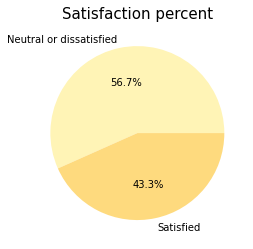

In [10]:
plt.pie(data.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
pass
plt.title("Satisfaction percent",fontsize=15)
plt.figsize=(500,500)


  From the above pie chart, we can observe that the rate of satisfied reviews is lesser than rate of neutral or dissatisfied reviews.

###Visualizing Numerical Data

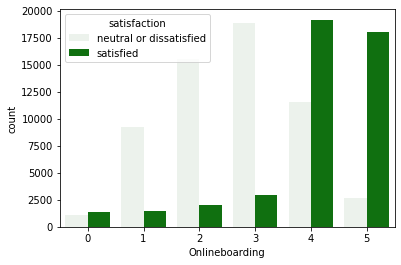

In [11]:
sns.countplot(x='Onlineboarding',hue="satisfaction",data=df,color="green")

We can observe that people boarding from gate 1,2 and 3 are giving neutral or dissatisfied reviews more than satisfied reviews while the ratio of neutral or dissatisfied review and satisfied review are almost the same in gate 0 and ratio of neutral or dissatisfied reviews are lesser than the satisfied reviews.

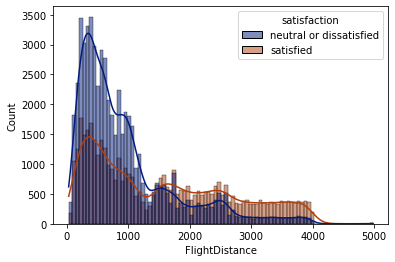

In [12]:
sns.histplot(x='FlightDistance',hue="satisfaction",data=df,kde=True,palette="dark")

From the above diagram that in majority when the flight distance is less the neutral or dissatified reviews becomes more than the satisfied reviews. But, as the flight distance increases the satisfid reviews becomes more than the neutral or dissatisfied reviews.

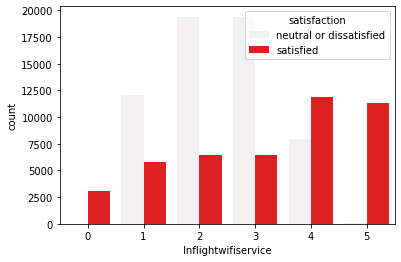

In [13]:
sns.countplot(x='Inflightwifiservice',hue="satisfaction",data=df,color="red")

From the above diagram, we can observe that the satisfied reviews is greater than neutral or dissatisfied reviews in 0,4 and 5 in theratio of satisfied reviews and neutral or dissatisfied

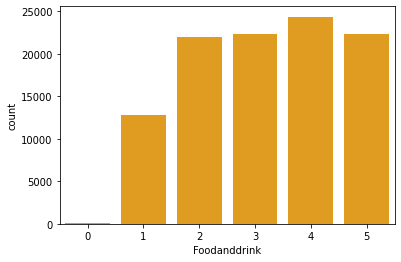

In [14]:
sns.countplot(x='Foodanddrink',data=df,color="orange")

From the above diagram, we can observe that people mostly people give 4 as reviews and only a few rarely give 0 as review.

In [15]:
df.describe()

,Age,FlightDistance,Inflightwifiservice,Departure/Arrivaltimeconvenient,EaseofOnlinebooking,Gatelocation,Foodanddrink,Onlineboarding,Seatcomfort,Inflightentertainment,On-boardservice,Legroomservice,Baggagehandling,Checkinservice,Inflightservice,Cleanliness,DepartureDelayinMinutes,ArrivalDelayinMinutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


##Preprocessing Data

In [17]:
le = LabelEncoder() 
df.Gender= le.fit_transform(df.Gender)
df.CustomerType= le.fit_transform(df.CustomerType)
df.Age= le.fit_transform(df.Age)
df.TypeofTravel= le.fit_transform(df.TypeofTravel)
df.Class= le.fit_transform(df.Class)
df.satisfaction= le.fit_transform(df.satisfaction)

In [16]:
df.head()

,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Inflightwifiservice,Departure/Arrivaltimeconvenient,EaseofOnlinebooking,Gatelocation,Foodanddrink,Onlineboarding,Seatcomfort,Inflightentertainment,On-boardservice,Legroomservice,Baggagehandling,Checkinservice,Inflightservice,Cleanliness,DepartureDelayinMinutes,ArrivalDelayinMinutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


##Correlationships of data

In [18]:
df.corr()

,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Inflightwifiservice,Departure/Arrivaltimeconvenient,EaseofOnlinebooking,Gatelocation,Foodanddrink,Onlineboarding,Seatcomfort,Inflightentertainment,On-boardservice,Legroomservice,Baggagehandling,Checkinservice,Inflightservice,Cleanliness,DepartureDelayinMinutes,ArrivalDelayinMinutes,satisfaction
Gender,1.000000,-0.031732,0.008941,0.006909,-0.012870,0.005828,0.008974,0.009142,0.006951,0.000333,0.005772,-0.042260,-0.026502,0.006117,0.008156,0.031798,0.037391,0.010563,0.039410,0.006505,0.002935,0.000396,0.012211
CustomerType,-0.031732,1.000000,-0.281735,-0.308333,0.042638,-0.225200,-0.007543,-0.206869,-0.019509,0.006078,-0.059454,-0.189262,-0.159484,-0.109930,-0.056560,-0.047868,0.024723,-0.032177,0.022670,-0.083613,0.004036,0.004747,-0.187638
Age,0.008941,-0.281735,1.000000,-0.048501,-0.117359,0.099475,0.017866,0.038135,0.024828,-0.001339,0.023010,0.208970,0.160298,0.076466,0.057628,0.040590,-0.047521,0.035483,-0.049379,0.053613,-0.010157,-0.012150,0.137207
TypeofTravel,0.006909,-0.308333,-0.048501,1.000000,0.487088,-0.267344,-0.105085,0.259763,-0.133511,-0.030700,-0.063439,-0.224803,-0.124399,-0.148199,-0.056543,-0.138803,-0.031321,0.016751,-0.022599,-0.079207,-0.005432,-0.005683,-0.449000
Class,-0.012870,0.042638,-0.117359,0.487088,1.000000,-0.427219,-0.023112,0.089922,-0.094329,-0.004488,-0.077042,-0.297062,-0.210158,-0.179028,-0.207748,-0.197321,-0.163998,-0.157112,-0.158604,-0.125988,0.010281,0.014701,-0.449321
FlightDistance,0.005828,-0.225200,0.099475,-0.267344,-0.427219,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002426,0.298780
Inflightwifiservice,0.008974,-0.007543,0.017866,-0.105085,-0.023112,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019095,0.284245
Departure/Arrivaltimeconvenient,0.009142,-0.206869,0.038135,0.259763,0.089922,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000864,-0.051601
EaseofOnlinebooking,0.006951,-0.019509,0.024828,-0.133511,-0.094329,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007984,0.171705
Gatelocation,0.000333,0.006078,-0.001339,-0.030700,-0.004488,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005143,0.000682


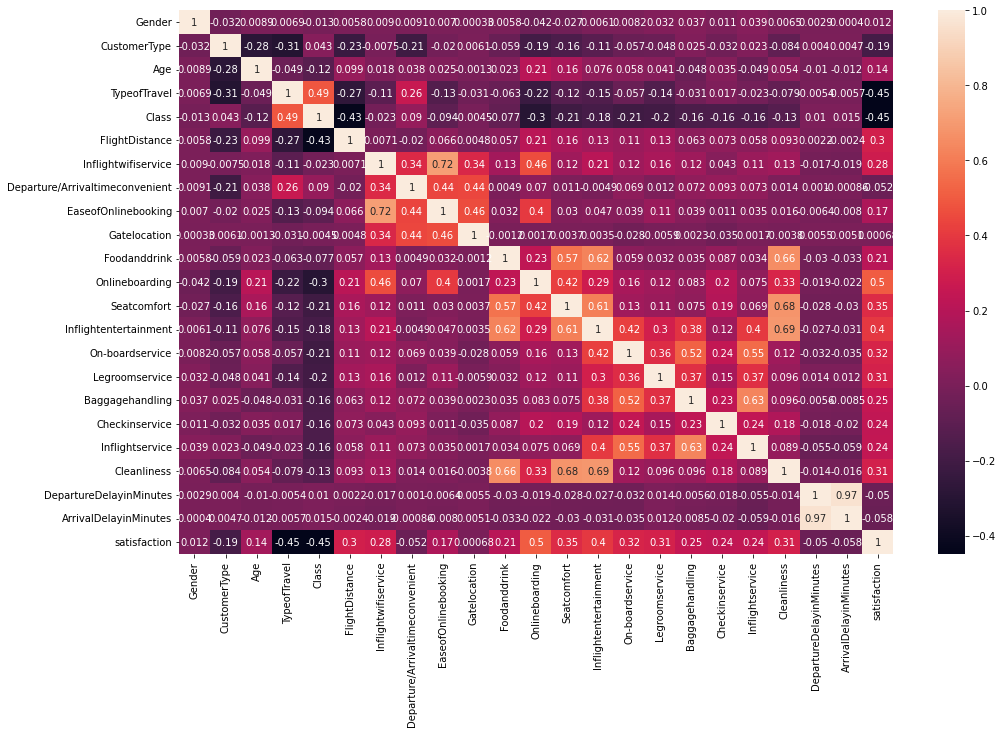

In [25]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

In the above heat map, the colors representing the two corresponding columns represents their correltion to each other. If the correlation is positively high the color becomes light while it becomes darker and darker as the correlation reduces

In [19]:
df.head()

,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Inflightwifiservice,Departure/Arrivaltimeconvenient,EaseofOnlinebooking,Gatelocation,Foodanddrink,Onlineboarding,Seatcomfort,Inflightentertainment,On-boardservice,Legroomservice,Baggagehandling,Checkinservice,Inflightservice,Cleanliness,DepartureDelayinMinutes,ArrivalDelayinMinutes,satisfaction
0,1,0,6,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,1,18,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,0,19,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,0,0,18,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,1,0,54,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


  ## Preprocessing and modeling

In [20]:
x = df.drop(['DepartureDelayinMinutes','ArrivalDelayinMinutes','satisfaction'], axis = 1)
y = df['satisfaction']

Here x and y columns are divided such that x contains independant columns while y contains dependant column

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=1)

dividing data stored in x and y into 2 parts each with ratio (7:3). In which, the larger ratio is for training while the rest of the smaller part is to check the accuracy.

In [22]:
logmodel = LogisticRegression()

In [26]:
logmodel.fit(x_train,y_train)

LogisticRegression()

In [27]:
predictions = logmodel.predict(x_test)

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86     17692
           1       0.81      0.82      0.82     13480

    accuracy                           0.84     31172
   macro avg       0.84      0.84      0.84     31172
weighted avg       0.84      0.84      0.84     31172



In [29]:
confusion_matrix(y_test,predictions)

array([[15156,  2536],
       [ 2365, 11115]])

From the confusion matrix we can observe that there are 15156 number of True Positive, 2536 number of False Positive, 2356 number of False Negative and 11115 number of True Negative based on the predicted values.

ROC AUC Score : 0.8406066364049267


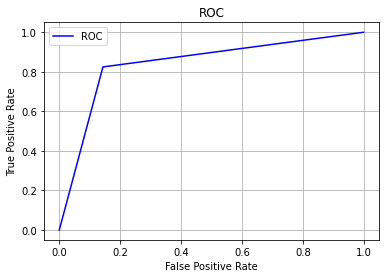

In [30]:
auc = roc_auc_score(y_test,predictions)
print("ROC AUC Score :",auc)
fpr,tpr,thresholds = roc_curve(y_test,predictions)
plt.plot(fpr, tpr, color='blue', label='ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.grid()
plt.show()

From the above diagram, we can finf out that the predicted values are better and precise since the roc curve leans more towards the true positive rate.